# 4: Visualize WhatsApp Data

By: Sharon Makunura

In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import regex
from seaborn import *
from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px
from datetime import *
import datetime as dt


Most of the visualizations for this project have been completed in Excel.  Here, only two visualizations ae showcased: a word cloud and a heatmap showing most active period of a week.  

In [4]:
whatsapp_df=pd.read_csv('whatsapp_dataset.csv')


In [13]:
#format dates
whatsapp_df['Date'] = pd.to_datetime(whatsapp_df['Date'])
whatsapp_df['Day']=whatsapp_df['Date'].dt.day_name()

In [6]:
#create function to replace some text in messages that should not be counted as text
def txtMsg(msg_series):
    non_msg_dict={' media shared':"",' this message was deleted':""}
    txt_series=msg_series.replace(non_msg_dict)
    
    return txt_series

In [7]:
#create string of all messages

#begin by removing mms and deleted messages
chat_text=txtMsg(whatsapp_df['Chat'])
#create string" ".join(txt for txt in dataset['Review Text'])
chat_string=''.join(chat for chat in chat_text)

In [8]:
stopwords=list(STOPWORDS)
additional=['rhapsody','bit', 'ly', '2z9p6p0','devotional','influencer','https','pastor','chris','realities','download' ]
for each in additional:
    stopwords.append(each)

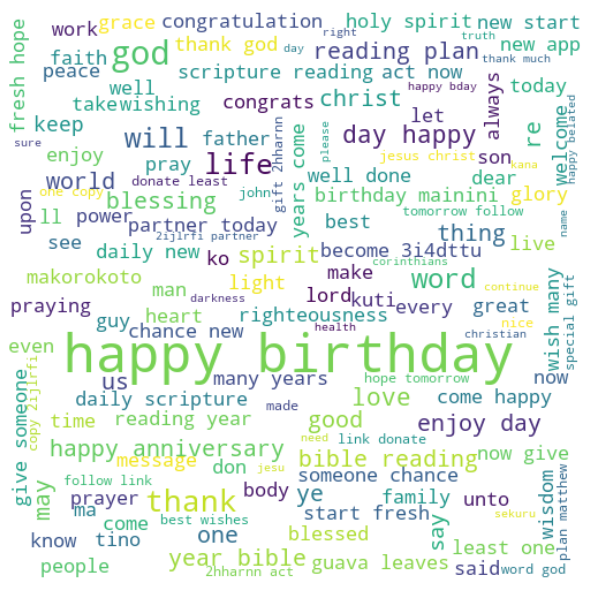

In [9]:


wordcloud = WordCloud( width = 500, height = 500,
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(chat_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [10]:
#plt.savefig('original_cloud.png')
plt.savefig('whatsapp_word_cloud.png')

<Figure size 432x288 with 0 Axes>

In [14]:
split_df = pd.concat([whatsapp_df, whatsapp_df['Time'].str.split(':', expand=True)],axis=1)
split_df.rename(columns = {0:'Hour', 1:'Min'}, inplace =True)


In [15]:
#create heatmap showing most active times

df2 = split_df.groupby(['Hour', 'Day'], as_index=False)['Chat'].count()

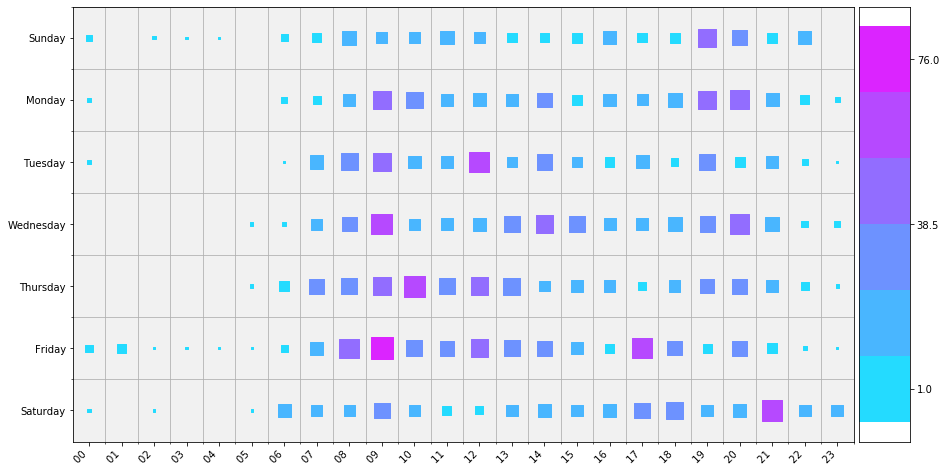

In [16]:
days = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15,8))
heatmap(
    x=df2['Hour'],
    y=df2['Day'],
    size_scale = 500,
    size = df2['Chat'],
    y_order = days[::-1],
    color = df2['Chat'], 
    palette = sns.color_palette("cool")
)